http://www.nuforc.org/webreports/ndxevent.html

https://data.world/timothyrenner/ufo-sightings

In [8]:
from bs4 import BeautifulSoup as bsoup
from urllib.request import Request, urlopen
import urllib.error
import csv
import requests
import pandas as pd
import numpy as np
import time
import logging

from wordcloud import WordCloud
import matplotlib.pyplot as plt

!pip install country_list
import country_list

%matplotlib inline

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
logging.basicConfig(filename='sightings_analysis.log', format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S', level=logging.INFO)
logger = logging.getLogger()

In [16]:
file_name = "sightings_cleaned.pkl"
logger.info(f"Data read from {file_name}")
sightings_cleaned = pd.read_pickle(file_name)

len(sightings_cleaned)

67841

In [17]:
sightings_cleaned.Duration.unique()

array(['9 minutes', 'Seconds', '5 minutes', ..., '94 seconds',
       '2400 hours', 'Minutes, maybe longer, it'], dtype=object)

In [ ]:
"""
Things to do:

https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
https://www.analyticsvidhya.com/blog/2020/12/understanding-text-classification-in-nlp-with-movie-review-example-example/
https://blog.dataiku.com/text-classification-the-first-step-toward-nlp-mastery
https://thinkinfi.com/complete-guide-for-natural-language-processing-in-python/
https://towardsdatascience.com/nlp-in-python-vectorizing-a2b4fc1a339e
"""

In [20]:
sightings_cleaned.Shape.value_counts()

Light        14832
Circle        8086
Triangle      5944
Fireball      5340
Sphere        4897
Unknown       4559
Other         4371
Disk          3119
Oval          2921
Formation     2531
Changing      1705
Cigar         1550
Rectangle     1237
Flash         1228
Cylinder      1070
Diamond       1002
Chevron        750
Teardrop       583
Egg            483
Cross          241
Cone           235
Name: Shape, dtype: int64

In [19]:
sightings_cleaned.loc[sightings_cleaned.Shape == "TRIANGULAR", "Shape"] = "Triangle"
# sightings_cleaned.loc[sightings_cleaned.Shape == "Unknown", "Shape"] = None
sightings_cleaned.loc[sightings_cleaned.Shape == "", "Shape"] = None

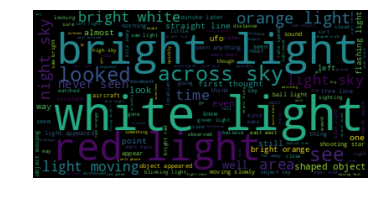

In [21]:
text = " ".join(t for t in sightings_cleaned.Detail_Summary_nltk.astype(str))
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

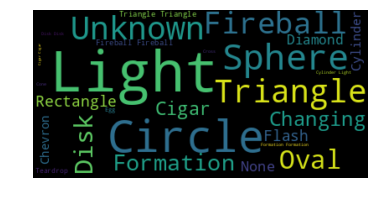

In [22]:
text = " ".join(t for t in sightings_cleaned.Shape.astype(str))
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()